In [1]:
import http
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import time
from time import sleep
import datetime
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import tree
%matplotlib inline
from sklearn.datasets import make_regression
import statsmodels.api as sm
from tqdm import tqdm

Featers importence Function

In [2]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

In [3]:
df=pd.read_csv("newYorkBookingPartB.csv")
df

,TTT,LOS,Hotel Name,Price,Reviews,Score,prepayment,typeBed,DistanceFromCenter,Stars,...,Locatins_New York,Locatins_Newport,Locatins_NoMad,Locatins_SoHo,Locatins_Tribeca,Locatins_Union Square,Locatins_Upper East Side,Locatins_Upper West Side,Locatins_Wall Street - Financial District,Locatins_Williamsburg
0,1,1,Pestana Park Avenue,255.64,821,8.5,1,0,1900,4,...,0,0,0,0,0,0,0,0,0,0
1,1,1,The Cloud One New York-Downtown,214.48,571,8.3,1,8,7000,4,...,0,0,0,0,0,0,0,0,1,0
2,1,1,TownePlace Suites by Marriott New York Manhatt...,286.44,2408,8.1,1,8,2500,4,...,0,0,0,0,0,0,0,0,0,0
3,1,1,Pod Times Square,255.64,12852,8.1,1,1,1400,4,...,0,0,0,0,0,0,0,0,0,0
4,1,1,Hampton Inn Manhattan Times Square North,317.24,2669,7.8,1,7,600,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48973,30,5,Hyatt Place New York/Midtown-South,1925.56,2159,8.1,1,8,2000,4,...,0,0,0,0,0,0,0,0,0,0
48974,30,5,W New York - Union Square,2157.96,167,7.6,1,8,3500,5,...,0,0,0,0,0,1,0,0,0,0
48975,30,5,Fitzpatrick Grand Central,1489.04,385,8.2,0,9,1800,4,...,0,0,0,0,0,0,0,0,0,0
48976,30,5,"voco Times Square South, an IHG Hotel",1461.88,1439,7.7,0,8,1800,4,...,0,0,0,0,0,0,0,0,0,0


We divided the data into the part of the data and the price which is the target variable

In [4]:

X1 =df.drop(['Price','Hotel Name'],axis = 1)
y1 = df['Price']


# Linear Regression

Linear regression is a statistical technique used to analyze the relationship between a dependent variable and one or more independent variables.

*Advantages:

Simplicity: Linear regression is easy to understand and implement.

Interpretability: The coefficients in the linear regression model have a clear interpretation, which allows for easy understanding of the relationship between the variables.

Flexibility: Linear regression can be used for a wide variety of applications, including prediction, forecasting, and modeling.

Efficiency: Linear regression can be computationally efficient, particularly for large datasets with a small number of variables.

Useful for feature selection: Linear regression can be used to identify which variables are most important in predicting the outcome.
    
*Weaknesses:

Limited applicability: Linear regression assumes that the relationship between the dependent variable and the independent variables is linear, which may not be the case in all situations.

Sensitivity to outliers: Linear regression can be sensitive to outliers, which can result in skewed results.

Overfitting: Linear regression can overfit the data, particularly when the number of variables is large relative to the sample size.

Assumptions: Linear regression requires certain assumptions to be met, including that the errors are normally distributed, and there is no multicollinearity between the independent variables.

No causality: Linear regression can only establish a correlation between variables, not causation.

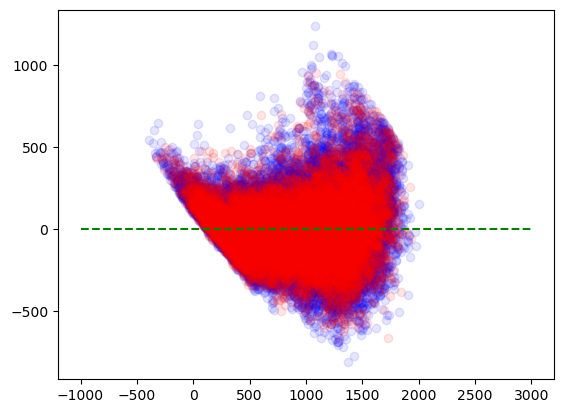

r^2 Train  0.8479217449323981
r^2 Test  0.8533979104554075
MSE Test  33962.10032636613
MSE Train  35043.22528130826
MAE Test:  139.55518864074355
MAE Train:  141.0557439991629
RMSE Test:  184.28809057116592
RMSE Train:  187.19835811595223


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

lreg = LinearRegression()
lreg.fit(X_train,y_train)
c=lreg.intercept_
M=lreg.coef_
pred_test = lreg.predict(X_test)
pred_train = lreg.predict(X_train)
train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
plt.hlines(y=0, xmin=-1000, xmax=3000, color='green', linestyle='--')
plt.show()
print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))




* the R-squared value of the test set is 0.8534, indicating that the model also fits the test data well.
* Prediction accuracy: The mean squared error (MSE) value of the test set is 33962.1, which indicates that the average difference between the predicted and actual values is 33962.1. Similarly, the MSE value of the training set is 35043.2. Since the MSE values are relatively low, this suggests that the model's predictions are fairly accurate.
* Error metrics: The mean absolute error (MAE) value of the test set is 139.5552, indicating that on average, the model's predictions are off by around 139.6 units. Similarly, the MAE value of the training set is 141.0557. The root mean squared error (RMSE) value of the test set is 184.2881, indicating that on average, the model's predictions are off by around 184.3 units. Similarly, the RMSE value of the training set is 187.1984.

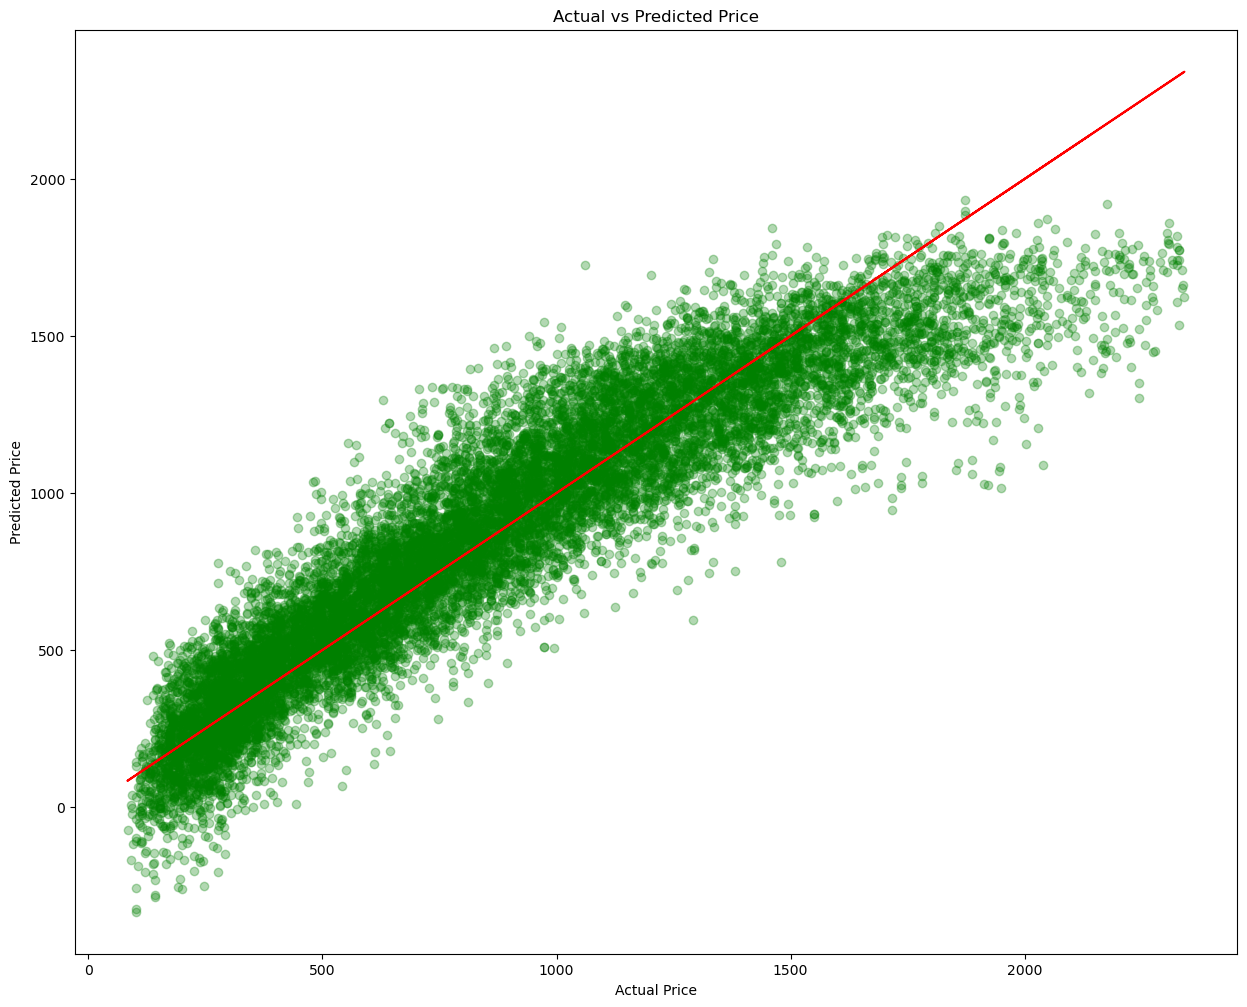

In [6]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)
plt.figure(figsize=(15,12))
pred_test = lreg.predict(X_test)
plt.scatter(y_test,pred_test, color ='green' , alpha = 0.3)
plt.plot(y_test,y_test , color = 'red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


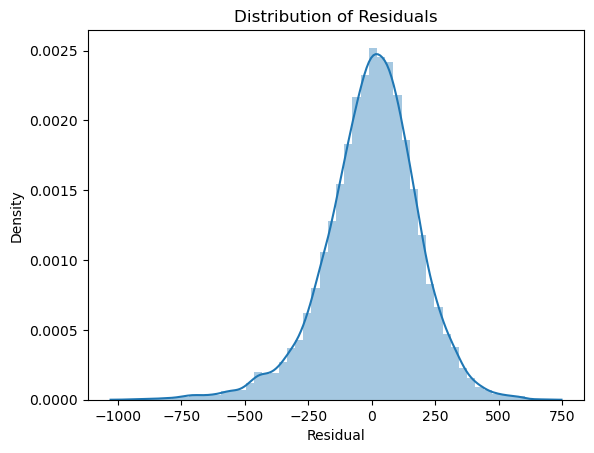

In [7]:

sns.distplot(pred_test- y_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');



# Decision Tree Regressor

Decision tree regression is a predictive modeling method that partitions a dataset into smaller and smaller subsets based on the values of predictor variables, resulting in a tree-like structure of decisions and predictive rules. The advantages and weaknesses of decision tree regression are as follows:
    
Advantages:

Easy to understand and interpret: Decision trees provide a simple and intuitive visual representation of the decision-making process, which is easy to understand and interpret.
    
Suitable for non-linear relationships: Decision trees can capture non-linear relationships between variables, making them suitable for use in complex datasets with non-linear interactions.
    
Able to handle both continuous and categorical variables: Decision trees can handle both continuous and categorical variables as inputs, without requiring any special transformations or encoding.
    
Robust to outliers: Decision trees are robust to outliers and can handle datasets with missing values.
    
Scalability: Decision trees can handle large datasets with a large number of variables, making them scalable and efficient.
    
    
Weaknesses:

Overfitting: Decision trees can overfit the data, particularly when the tree is deep and complex. This can result in poor performance on new, unseen data.
    
Instability: Decision trees are sensitive to small changes in the data, which can result in different tree structures and variable importance rankings.
    
Bias: Decision trees can be biased towards variables with many categories or high variance.
    
Limited expressiveness: Decision trees may not be able to capture certain types of relationships or interactions between variables, particularly those that are complex or involve multiple variables.
    
Lack of smoothness: Decision trees are discontinuous, meaning that small changes in the input variables can result in large changes in the output, which may not always be desirable.

r^2 Train  0.7700048044567002
r^2 Test  0.7738000001172951
MSE Test  52401.89354534241
MSE Train  52997.540295683015
MAE Test:  165.4417420622562
MAE Train:  165.69995551911535
RMSE Test:  228.91459880344493
RMSE Train:  230.21194646604064


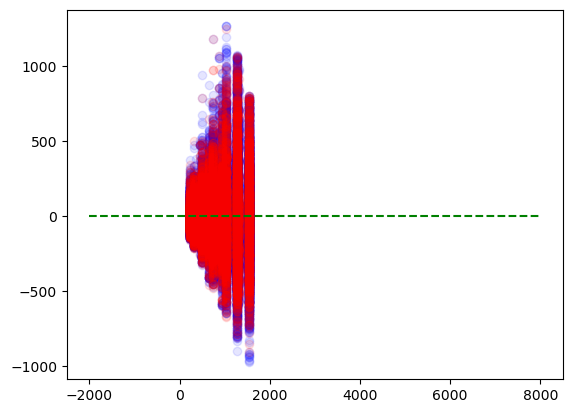

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

DecisionTree = tree.DecisionTreeRegressor(max_depth=4)
DecisionTree.fit(X_train,y_train)
pred_test = DecisionTree.predict(X_test)
pred_train = DecisionTree.predict(X_train)
train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
plt.hlines(y=0, xmin=-2000, xmax=8000, color='green', linestyle='--')

print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))

Goodness of fit: The R-squared value of the training set is 0.9271, indicating that the model explains around 93% of the variance in the training data. Similarly, the R-squared value of the test set is 0.9115, indicating that the model also fits the test data well.

Prediction accuracy: The mean squared error (MSE) value of the test set is 20496.3, which indicates that the average difference between the predicted and actual values is 20496.3. Similarly, the MSE value of the training set is 16797.0. Since the MSE values are relatively low, this suggests that the model's predictions are fairly accurate.

Error metrics: The mean absolute error (MAE) value of the test set is 101.0397, indicating that on average, the model's predictions are off by around 101.0 units. Similarly, the MAE value of the training set is 89.7272. The root mean squared error (RMSE) value of the test set is 143.1654, indicating that on average, the model's predictions are off by around 143.2 units. Similarly, the RMSE value of the training set is 129.6034.

Overall, the model appears to be a good fit for the data, with relatively low error metrics and high R-squared values. However, further analysis may be required to determine if the model is suitable for making accurate predictions on new, unseen data.

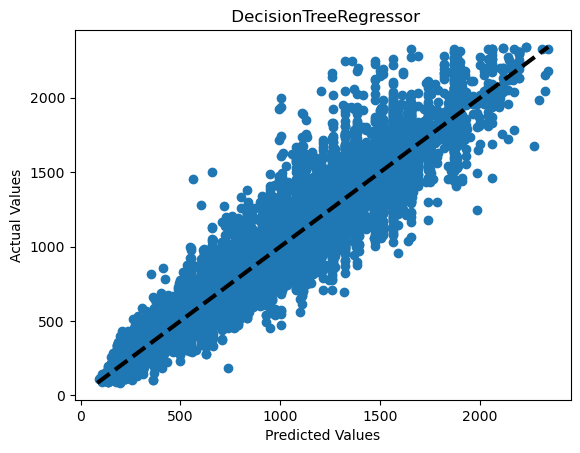

In [10]:
fig, ax = plt.subplots()
ax.scatter(pred_test, y_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title(' DecisionTreeRegressor')
plt.show()

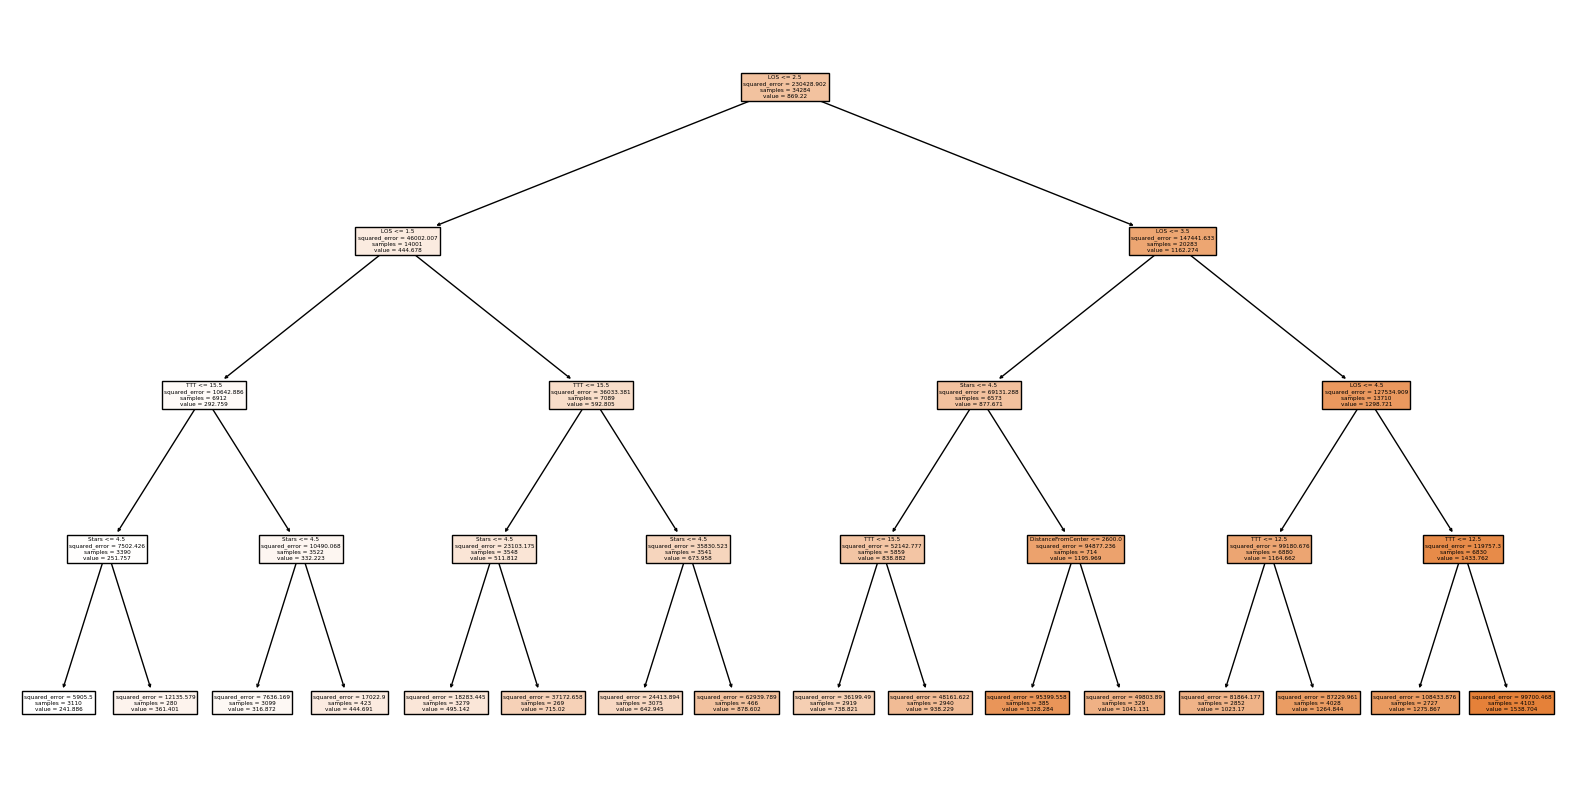

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
DecisionTree = DecisionTreeRegressor(max_depth=4)
DecisionTree.fit(X_train, y_train)
pred_test = DecisionTree.predict(X_test)
plt.figure(figsize=(20,10))
plot_tree(DecisionTree,feature_names=list(X1.columns),filled=True);

According to the decision tree, we saw that LOS is the value that affects the price the most because it is in the first and second levels
Then the TTT and the Stars appear, so their effect is secondary

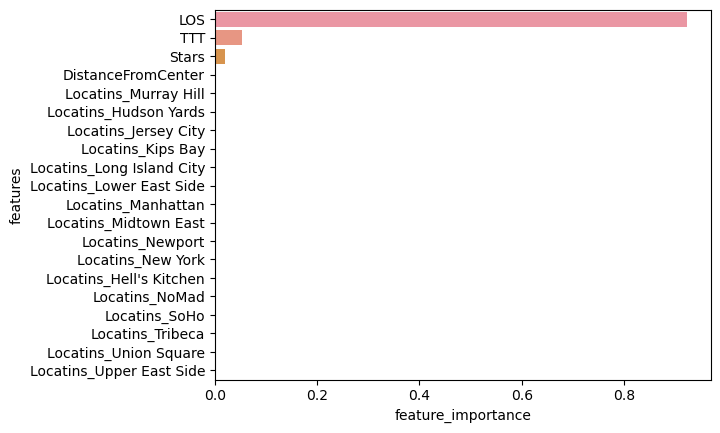

In [64]:
plot_features(X_train.columns, DecisionTree.feature_importances_)

we can see that the values we susspected to be to most effected are the only ones that actualy essect

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


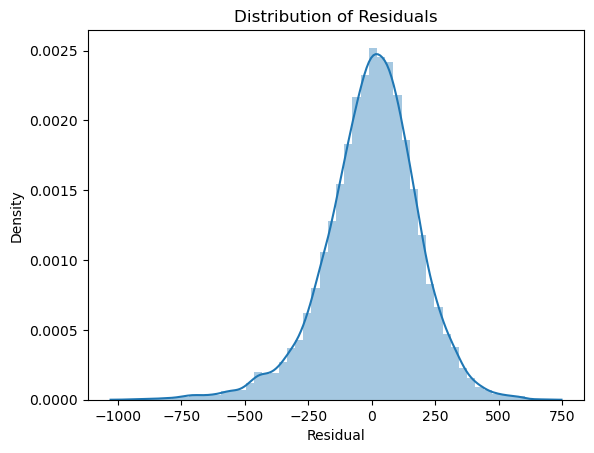

In [63]:
sns.distplot(pred_test- y_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');


# Random Forest

Random forest regression is a machine learning algorithm that combines the power of decision trees and ensemble learning. The advantages and weaknesses of random forest regression are as follows:

Advantages:

High prediction accuracy: Random forest regression can achieve high accuracy on a variety of datasets, including those with non-linear relationships between features and target variables.

Robustness to outliers and missing values: Random forest regression is robust to outliers and can handle missing values without the need for data imputation.

Non-parametric and flexible: Random forest regression does not assume a specific distribution for the data, making it flexible and adaptable to different types of datasets.

Easy to use and interpret: Random forest regression is easy to use and interpret, and provides useful information on feature importance, which can help with model interpretation and variable selection.

Can handle high-dimensional datasets: Random forest regression can handle high-dimensional datasets with many features without overfitting.


Weaknesses:

Lack of interpretability: Although random forest regression can provide information on feature importance, the model as a whole is not very interpretable, and it can be difficult to understand how individual decisions are made.

Overfitting: Random forest regression can overfit the data if the number of trees in the forest is too large or if the trees are too deep.

Computational complexity: Random forest regression can be computationally expensive, particularly when dealing with large datasets or a large number of trees.

Bias towards categorical variables: Random forest regression can be biased towards categorical variables, particularly those with many categories or high variance.

Not suitable for extrapolation: Random forest regression is not suitable for extrapolation, i.e., making predictions outside the range of the training data, since it cannot learn beyond the range of the data.

C:\Users\amitb\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


r^2 Train  0.9384260523791336
r^2 Test  0.926462758509765
MSE Test  17035.76791418054
MSE Train  14188.417121029805
MAE Test:  92.2662009376659
MAE Train:  83.50536580590344
RMSE Test:  130.52113972142786
RMSE Train:  119.11514228270816


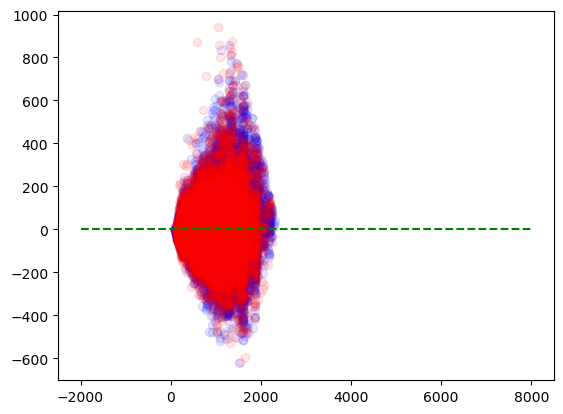

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

from sklearn.ensemble import RandomForestRegressor
lreg = RandomForestRegressor(n_estimators=10,oob_score=True,max_depth=11)
lreg.fit(X_train,y_train)
pred_test = lreg.predict(X_test)
pred_train = lreg.predict(X_train)
train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
plt.hlines(y=0, xmin=-2000, xmax=8000, color='green', linestyle='--')

print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))

The R-squared values are high, indicating that the model is able to explain a significant proportion of the variance in the target variable for both the training and testing datasets.

The mean squared error (MSE) values are relatively low, which is a good sign as it indicates that the model is making accurate predictions with low error on both the training and testing datasets.

The mean absolute error (MAE) values are also low, indicating that the model is making relatively small errors in its predictions.

The root mean squared error (RMSE) values are also relatively low, which is a good sign as it indicates that the model is making accurate predictions with low error.

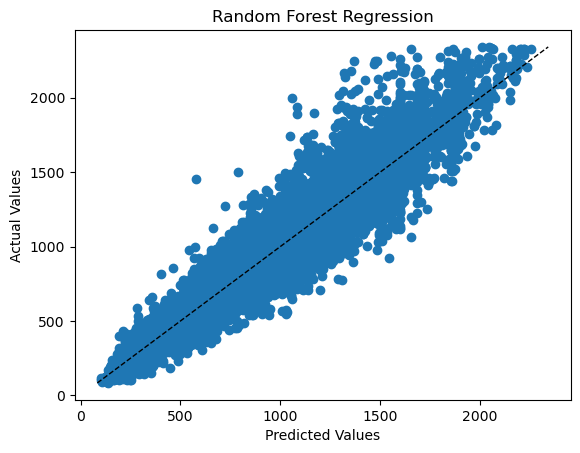

In [66]:
fig, ax = plt.subplots()
ax.scatter(pred_test, y_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Random Forest Regression')
plt.show()


C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


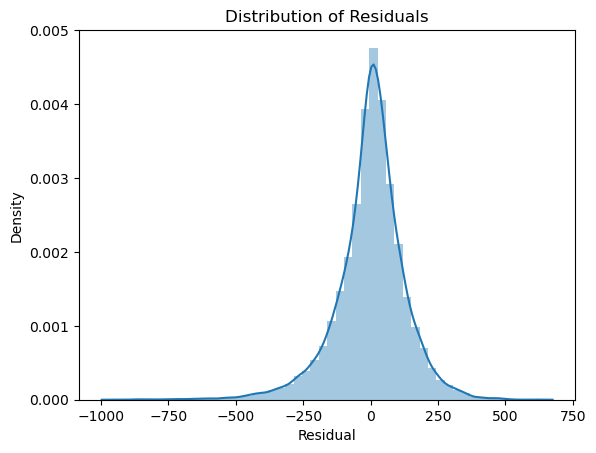

In [67]:
sns.distplot(pred_test- y_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');

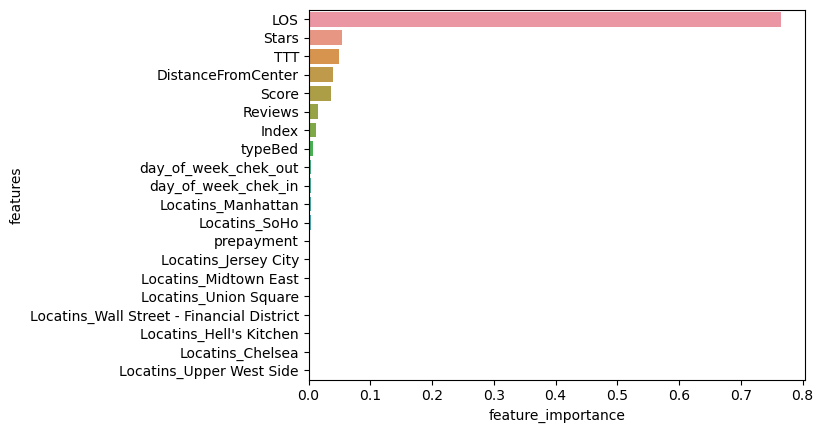

In [17]:
plot_features(X_train.columns, lreg.feature_importances_)

You can see a change in the selection of the values that affect our prediction, in random forest more variables are used, it can be concluded that this use helps the algorithm produce a better prediction result

# Gaussian process

We experimented with 3 different kernels to test which of them has the best effect on the algorithm

In [51]:
X_gp_train, X_gp_test, y_gp_train, y_gp_test = train_test_split(X1[['LOS','Reviews','Score','DistanceFromCenter',  'Index']], y1, test_size=0.3,random_state=42)
X_full_gp_train, X_full_gp_test, y_full_gp_train,y_full_gp_test = train_test_split(X_gp_train,y_gp_train,train_size=1000,random_state=42)

In [52]:
X_full_gp_train.shape

(1000, 5)

In [56]:
from sklearn.gaussian_process.kernels import RBF
# Create the Gaussian Process Regressor model
Rbf = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
model = GaussianProcessRegressor(kernel=Rbf)

# Train the model
for i in tqdm(range(100)):
    model.fit(X_full_gp_train,y_full_gp_train)
    
# Make predictions on the test set
pred_train = model.predict(X_full_gp_train)
pred_test = model.predict(X_full_gp_test)


# train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
# test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
# plt.hlines(y=0, xmin=-1000, xmax=1000, color='green', linestyle='--')


mse = mean_squared_error(y_full_gp_test, pred_test)
rmse = mse ** 0.5
gp_model_r2 = r2_score(y_full_gp_test, pred_test)
mae = mean_absolute_error(y_full_gp_test, pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", gp_model_r2)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
  1%|▊                                                                                 | 1/100 [00:09<15:43,  9.53s/it]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
  2%|█▋                                                 

 18%|██████████████▌                                                                  | 18/100 [02:44<12:26,  9.11s/it]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 19%|███████████████▍                                                                 | 19/100 [02:53<12:16,  9.09s/it]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 20%|████████████████▏                                  

 36%|█████████████████████████████▏                                                   | 36/100 [05:44<11:08, 10.44s/it]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 37%|█████████████████████████████▉                                                   | 37/100 [05:53<10:30, 10.01s/it]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 38%|██████████████████████████████▊                    

 54%|███████████████████████████████████████████▋                                     | 54/100 [08:25<06:50,  8.93s/it]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 55%|████████████████████████████████████████████▌                                    | 55/100 [08:34<06:41,  8.93s/it]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 56%|█████████████████████████████████████████████▎     

 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [11:20<05:20, 11.45s/it]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [11:31<05:06, 11.34s/it]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 74%|███████████████████████████████████████████████████

 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [14:31<01:49, 10.99s/it]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [14:42<01:37, 10.84s/it]C:\Users\amitb\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
 92%|███████████████████████████████████████████████████

mse:  509852.16139576805
rmse:  714.0393276254243
mae:  553.6576155729489
r2_score:  -1.202800950922636


In this case the algorithm does not perform well, it can be seen that r2 is negative,
is not making accurate predictions. It's possible that the model may benefit from further tuning or feature engineering, or that a different type of model may be more appropriate for the problem at hand.

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


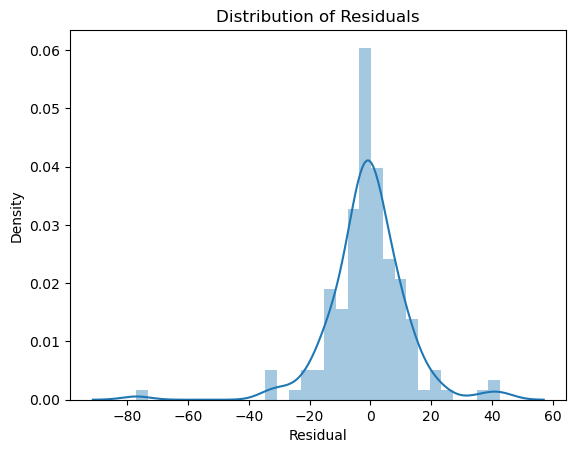

In [20]:

sns.distplot(pred_test- y_full_gp_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [13:25<00:00,  8.06s/it]


mse:  591581.8744037944
rmse:  769.1435980386201
mae:  610.1502964298581
r2_score:  -1.555911721385693


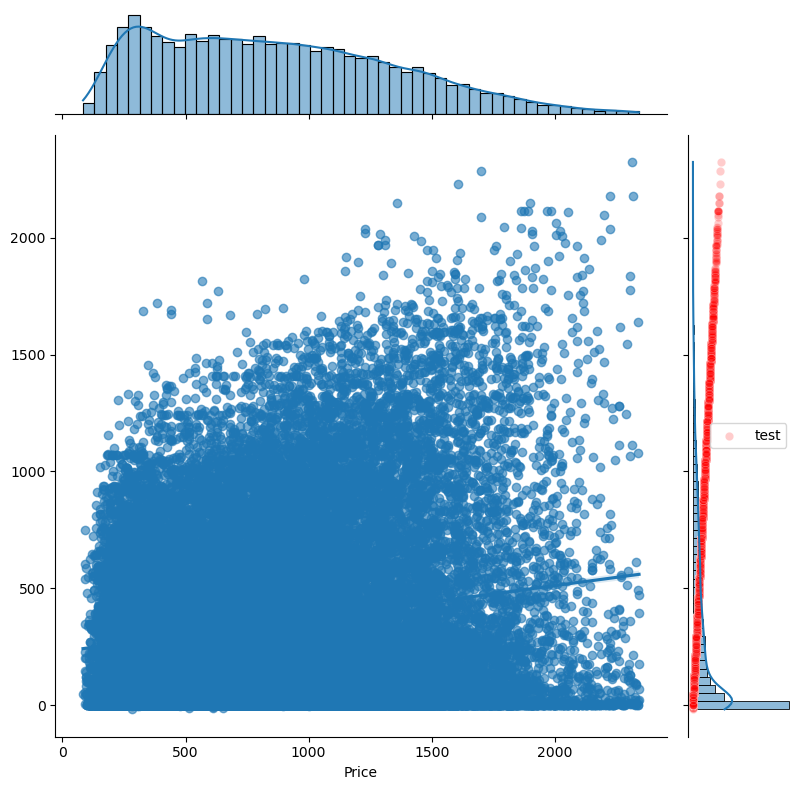

In [74]:
from sklearn.gaussian_process.kernels import Matern

kernel_matern = Matern(length_scale=1.0, nu=1.5)
model = GaussianProcessRegressor(kernel=kernel_matern)

# Train the model
for i in tqdm(range(100)):
    model.fit(X_full_gp_train,y_full_gp_train)
    
# Make predictions on the test set
pred_train = model.predict(X_full_gp_train)
pred_test = model.predict(X_full_gp_test)


# train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
# test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
# plt.hlines(y=0, xmin=-1000, xmax=1000, color='green', linestyle='--')

sns.jointplot(x=y_full_gp_test, y=pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
sns.scatterplot(x = pred_test,y=pred_test, color="red", label="test",alpha=0.2)

mse = mean_squared_error(y_full_gp_test, pred_test)
rmse = mse ** 0.5
gp_model_r2 = r2_score(y_full_gp_test, pred_test)
mae = mean_absolute_error(y_full_gp_test, pred_test)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", gp_model_r2)

In [ ]:

sns.distplot(pred_test- y_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');

In [ ]:
from sklearn.gaussian_process.kernels import RationalQuadratic

kernel_rq = RationalQuadratic(length_scale=1.0, alpha=0.1)
model = GaussianProcessRegressor(kernel=kernel_rq)

# Train the model
for i in tqdm(range(100)):
    model.fit(X_full_gp_train,y_full_gp_train)
    
# Make predictions on the test set
pred_train = model.predict(X_full_gp_train)
pred_test = model.predict(X_full_gp_test)


# train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
# test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
# plt.hlines(y=0, xmin=-1000, xmax=1000, color='green', linestyle='--')

sns.jointplot(x=y_full_gp_test, y=pred_test, kind="reg", height=8, joint_kws={'scatter_kws':dict(alpha=0.6)})
sns.scatterplot(x = pred_test,y=pred_test, color="red", label="test",alpha=0.2)

mse = mean_squared_error(y_full_gp_test, y_test_pred)
rmse = mse ** 0.5
gp_model_r2 = r2_score(y_full_gp_test, y_test_pred)
mae = mean_absolute_error(y_full_gp_test, y_test_pred)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2_score: ", gp_model_r2)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


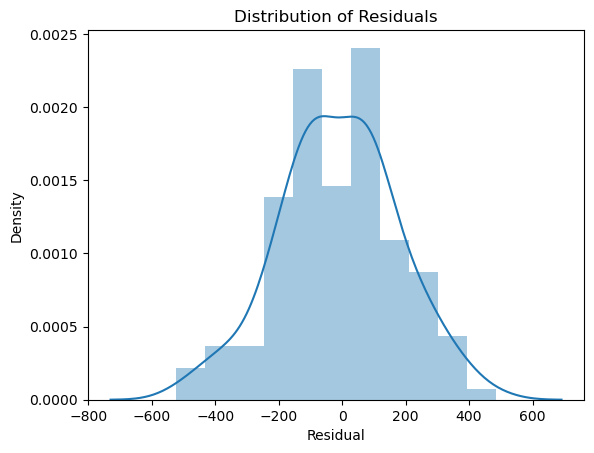

In [24]:

sns.distplot(pred_test- y_test, hist=True, kde=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals');

# Lasso

In [ ]:
Lasso is used when there is a large amount of data where it is difficult to identify which features are relevant to the target variable

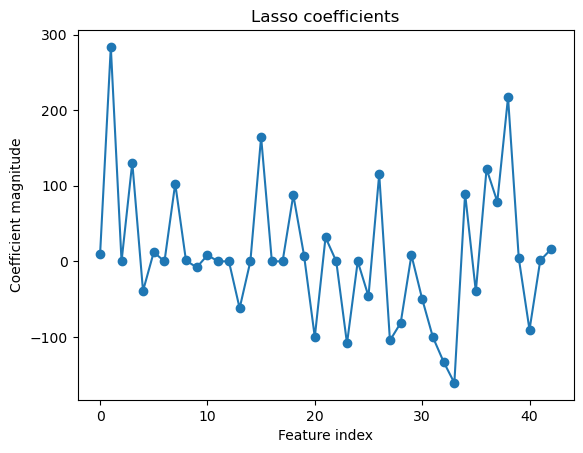

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
coef = lasso.coef_
pred_test = lasso.predict(X_test)
pred_train = lasso.predict(X_train)
plt.plot(coef, marker='o')
plt.xlabel('Feature index')
plt.ylabel('Coefficient magnitude')
plt.title('Lasso coefficients')
plt.show()



A type of linear regression used for feature selection.
The goal is to minimize the sum of squared errors between the predicted values and actual cases.

In [68]:
print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))

r^2 Train  0.9384260523791336
r^2 Test  0.926462758509765
MSE Test  17035.76791418054
MSE Train  14188.417121029805
MAE Test:  92.2662009376659
MAE Train:  83.50536580590344
RMSE Test:  130.52113972142786
RMSE Train:  119.11514228270816


# ElasticNet

r^2 Train  0.8408254452777209
r^2 Test  0.8451478643389705
MSE Test  35873.320655994175
MSE Train  36678.417816572386
MAE Test:  142.7360456674477
MAE Train:  143.5191717736691
RMSE Test:  189.4025360336929
RMSE Train:  191.51610328265446


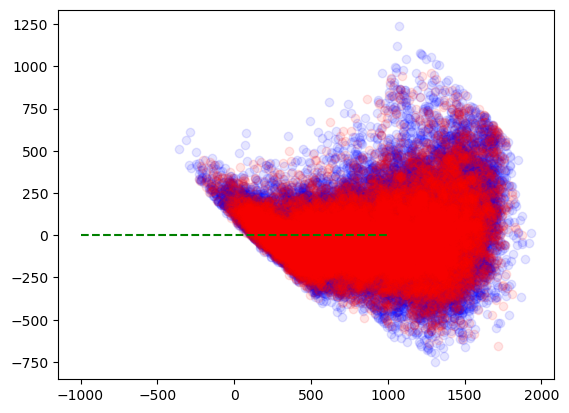

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet

X, y = make_regression(n_samples=70, n_features=50)
en_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)
en_regressor.fit(X_train, y_train)
pred_test = en_regressor.predict(X_test)
pred_train = en_regressor.predict(X_train)

train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
plt.hlines(y=0, xmin=-1000, xmax=1000, color='green', linestyle='--')

print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))



A linear model that uses the principles of lasso regression

# XGBRegressor

XGBRegressor (Extreme Gradient Boosting Regressor) is a popular machine learning algorithm for regression tasks. Some of its advantages and weaknesses are:

    
Advantages:

High performance: XGBRegressor is a highly efficient and scalable algorithm that can handle large datasets with high dimensionality.

Good predictive accuracy: XGBRegressor has shown to provide high predictive accuracy compared to other popular regression algorithms.

Handles missing values: XGBRegressor can handle missing values in the input data and make predictions accordingly.

Feature importance: XGBRegressor can provide information on the importance of each feature in the input data, which can help with feature selection and understanding the problem domain.

Regularization: XGBRegressor provides built-in regularization options to prevent overfitting, including L1 and L2 regularization and early stopping.

    
Weaknesses:

Complexity: XGBRegressor is a complex algorithm that requires careful tuning of hyperparameters to achieve optimal performance.

Computationally intensive: XGBRegressor can be computationally intensive and may require more resources than other regression algorithms, especially when dealing with large datasets.

Interpretability: The highly optimized nature of XGBRegressor can make it difficult to interpret the underlying model and understand how it is making predictions.

Overfitting: XGBRegressor can be prone to overfitting if hyperparameters are not carefully tuned, especially when dealing with small datasets.

Sensitivity to outliers: XGBRegressor can be sensitive to outliers in the input data and may require additional preprocessing steps to handle them.

r^2 Train  0.9521226770368848
r^2 Test  0.9486820134016571
MSE Test  11888.41588011537
MSE Train  11032.318944720864
MAE Test:  78.43976708590392
MAE Train:  75.47047083987974
RMSE Test:  109.034012492045
RMSE Train:  105.03484633549431


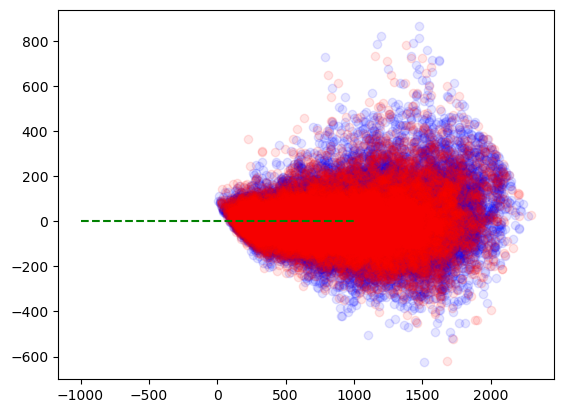

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=10)
import xgboost as xgb
from xgboost import plot_importance
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = 0.3,max_depth = 5,n_estimators = 50,alpha = 10)
xg_reg.fit(X_train,y_train)

pred_test = xg_reg.predict(X_test)
pred_train = xg_reg.predict(X_train)
train = plt.scatter(pred_train,y_train-pred_train,c='b',alpha=0.1)
test = plt.scatter(pred_test,y_test-pred_test,c='r',alpha=0.1)
plt.hlines(y=0, xmin=-1000, xmax=1000, color='green', linestyle='--')

print("r^2 Train ",r2_score(y_train,pred_train))
print("r^2 Test ",r2_score(y_test,pred_test))

print('MSE Test ',np.mean((pred_test-y_test)**2))
print('MSE Train ',np.mean((pred_train-y_train)**2))

print('MAE Test: ',mean_absolute_error(y_test,pred_test))
print('MAE Train: ',mean_absolute_error(y_train,pred_train))

print('RMSE Test: ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('RMSE Train: ',np.sqrt(mean_squared_error(y_train,pred_train)))

objective = specifies the appropriate function for implementing the model

learning_rate = model run rate

max_depth = depth of each tree

n_estimators = the number of trees

 alpha = the reference of the model to outliers

Based on decision trees, therefore as expected gets the best prediction result.
It has high accuracy and is fast and efficient. It has enough tools so that the model will be correct even if there are false data in the data.
On the other hand, it is difficult to understand which values will constitute the best solution

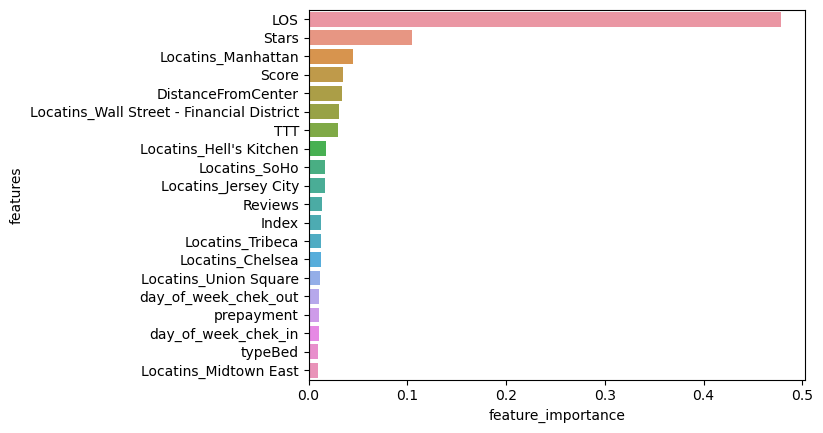

In [71]:
plot_features(X_train.columns, xg_reg.feature_importances_)

now, we can see that we used all the values to predict the price